In [40]:
import pandas as pd
import numpy as np

In [41]:
path = 'anime_with_synopsis.csv'

In [42]:
df = pd.read_csv(path)

In [43]:
df

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...
16209,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",No synopsis information has been added to this...
16210,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",ko is a typical high school student whose life...
16211,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Sequel to Higurashi no Naku Koro ni Gou .
16212,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",New Yama no Susume anime.


In [44]:
df['syp_len'] = df.apply(lambda x: len(str(x['sypnopsis'])),axis=1)

In [45]:
df.describe()

,MAL_ID,syp_len
count,16214.000000,16214.000000
mean,22069.271555,376.977859
std,14849.798248,340.211782
min,1.000000,3.000000
25%,6728.500000,107.000000
50%,24164.000000,264.000000
75%,35978.750000,575.000000
max,48492.000000,3047.000000


In [46]:
import matplotlib.pyplot as plt

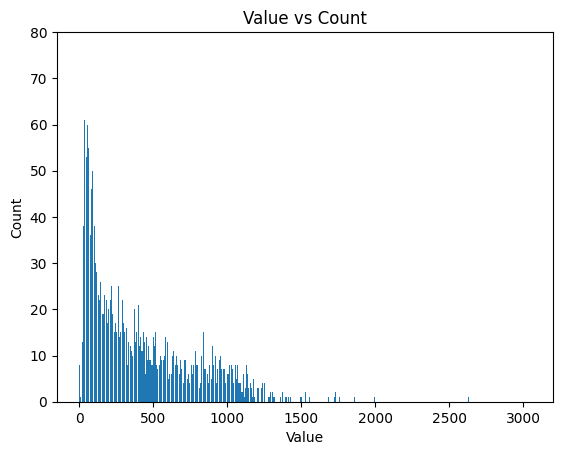

In [47]:
value_counts = df['syp_len'].value_counts().sort_index()

plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Value vs Count')
plt.ylim(0, 80)
plt.show()

In [48]:
df[df.apply(lambda x: 'No synopsis' in str(x['sypnopsis']), axis=1)]

,MAL_ID,Name,Score,Genres,sypnopsis,syp_len
2225,2626,The☆Doraemons: Mushimushi Pyonpyon Daisakusen!,6.27,Fantasy,No synopsis information has been added to this...,107
2226,2627,Doraemon: It's New Year!,6.49,"Kids, Comedy, Sci-Fi, Shounen",No synopsis information has been added to this...,107
2227,2628,"The☆Doraemons: Strange, Sweets, Strange?",6.29,Fantasy,No synopsis information has been added to this...,107
2228,2629,Doraemon and Itchy the Stray,6.35,"Comedy, Kids, Sci-Fi, Shounen",No synopsis information has been added to this...,107
2231,2632,Doraemon: Time Machine de Oshougatsu,6.41,"Sci-Fi, Adventure, Comedy, Kids, Shounen",No synopsis information has been added to this...,107
...,...,...,...,...,...,...
16178,48171,Summer Ghost,Unknown,Unknown,No synopsis information has been added to this...,107
16199,48426,Kitarou Tanjou: Gegege no Nazo,Unknown,"Comedy, Demons, Supernatural, Shounen",No synopsis information has been added to this...,107
16203,48442,Shikaru Neko,Unknown,Slice of Life,No synopsis information has been added to this...,107
16208,48480,Wan Jie Shen Zhu 3rd Season,Unknown,"Adventure, Fantasy",No synopsis information has been added to this...,107


In [49]:
print(df[df.apply(lambda x: 'No synopsis' in str(x['sypnopsis']), axis=1)]['sypnopsis'][2225])

No synopsis information has been added to this title. Help improve our database by adding a synopsis here .


In [50]:
df['sypnopsis'] = df['sypnopsis'].fillna('')

In [51]:
df.loc[df['sypnopsis'].str.startswith('No synopsis'), 'sypnopsis'] = ''

In [52]:
df[df.apply(lambda x: 'No synopsis' in str(x['sypnopsis']), axis=1)]

,MAL_ID,Name,Score,Genres,sypnopsis,syp_len


In [53]:
df[df['sypnopsis']=='']

,MAL_ID,Name,Score,Genres,sypnopsis,syp_len
2225,2626,The☆Doraemons: Mushimushi Pyonpyon Daisakusen!,6.27,Fantasy,,107
2226,2627,Doraemon: It's New Year!,6.49,"Kids, Comedy, Sci-Fi, Shounen",,107
2227,2628,"The☆Doraemons: Strange, Sweets, Strange?",6.29,Fantasy,,107
2228,2629,Doraemon and Itchy the Stray,6.35,"Comedy, Kids, Sci-Fi, Shounen",,107
2231,2632,Doraemon: Time Machine de Oshougatsu,6.41,"Sci-Fi, Adventure, Comedy, Kids, Shounen",,107
...,...,...,...,...,...,...
16178,48171,Summer Ghost,Unknown,Unknown,,107
16199,48426,Kitarou Tanjou: Gegege no Nazo,Unknown,"Comedy, Demons, Supernatural, Shounen",,107
16203,48442,Shikaru Neko,Unknown,Slice of Life,,107
16208,48480,Wan Jie Shen Zhu 3rd Season,Unknown,"Adventure, Fantasy",,107


In [54]:
df['syp_len'] = df.apply(lambda x: len(str(x['sypnopsis'])),axis=1)

In [55]:
df.columns.tolist()

['MAL_ID', 'Name', 'Score', 'Genres', 'sypnopsis', 'syp_len']

In [57]:
df

,MAL_ID,sypnopsis,syp_len
0,1,"In the year 2071, humanity has colonized sever...",1063
1,5,"other day, another bounty—such is the life of ...",857
2,6,"Vash the Stampede is the man with a $$60,000,0...",1005
3,7,ches are individuals with special powers like ...,435
4,8,It is the dark century and the people are suff...,721
...,...,...,...
16209,48481,,0
16210,48483,ko is a typical high school student whose life...,548
16211,48488,Sequel to Higurashi no Naku Koro ni Gou .,41
16212,48491,New Yama no Susume anime.,25


In [ ]:
value_counts = df['syp_len'].value_counts().sort_index()

plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Value vs Count')
plt.ylim(0, 80)
plt.show()

In [58]:
df=df[['MAL_ID','sypnopsis']]

In [59]:
df.columns = ['MAL_ID','synopsis']

In [60]:
df.to_csv('anime_synopsys.csv',index=False,encoding='utf-8-sig')

In [61]:
anime_smpl = pd.read_csv('anime_smpl.csv')

In [62]:
anime_smpl

,MAL_ID,Name,Score,Genres
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space"
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ..."
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural"
...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,0.00,"Adventure, Mystery, Supernatural"
17558,48483,Mieruko-chan,0.00,"Comedy, Horror, Supernatural"
17559,48488,Higurashi no Naku Koro ni Sotsu,0.00,"Mystery, Dementia, Horror, Psychological, Supe..."
17560,48491,Yama no Susume: Next Summit,0.00,"Adventure, Slice of Life, Comedy"


In [63]:
out = pd.merge(anime_smpl,df, how='inner', on=
              'MAL_ID')

In [64]:
out

,MAL_ID,Name,Score,Genres,synopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...
16209,48481,Daomu Biji Zhi Qinling Shen Shu,0.00,"Adventure, Mystery, Supernatural",
16210,48483,Mieruko-chan,0.00,"Comedy, Horror, Supernatural",ko is a typical high school student whose life...
16211,48488,Higurashi no Naku Koro ni Sotsu,0.00,"Mystery, Dementia, Horror, Psychological, Supe...",Sequel to Higurashi no Naku Koro ni Gou .
16212,48491,Yama no Susume: Next Summit,0.00,"Adventure, Slice of Life, Comedy",New Yama no Susume anime.


In [69]:
out = out[(out['synopsis']!='') & (out['Score']!=0)]
out

,MAL_ID,Name,Score,Genres,synopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...
16155,47307,Shin Gengou Nyankogelion,6.41,"Sci-Fi, Music, Mecha",Promotional music video for the Battle Cats x ...
16157,47398,Kimetsu Gakuen: Valentine-hen,6.59,Comedy,Valentine's Day special for Kimetsu no Yaiba ....
16158,47402,Heikousen,7.52,"Music, Romance","usic video for Eve and suis' song Heikousen , ..."
16166,47616,Yakusoku no Neverland 2nd Season: Michishirube,4.81,"Mystery, Psychological, Supernatural, Thriller...",cap of the first season of Yakusoku no Neverla...


In [71]:
out.to_csv('anime_synopsis.csv',index=False,encoding='utf-8-sig')

In [27]:
from transformers import AutoTokenizer, AutoModel
import torch

# E5 모델 및 토크나이저 로드
model_name = "intfloat/e5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)



In [28]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [29]:
from datasets import Dataset

In [30]:
dataset=Dataset.from_pandas(df)

In [31]:
# 텍스트를 토큰화하고 임베딩 생성
inputs = tokenizer(dataset['synopsys'][0], padding=True, truncation=True, return_tensors="pt")

In [32]:
inputs['input_ids'].size()

torch.Size([1, 230])

In [33]:
inputs

{'input_ids': tensor([[  101,  1999,  1996,  2095, 19843,  2487,  1010,  8438,  2038, 16844,
          3550,  2195,  1997,  1996, 11358,  1998, 23377,  1997,  1996,  5943,
          2291,  2975,  1996,  2085,  4895,  2378, 25459,  6590,  3468,  3302,
          1997,  4774,  3011,  2369,  1012,  1996,  6970,  5943,  2291,  2610,
          4740,  2000,  2562,  3521,  1999,  1996,  9088,  1010, 11553,  1999,
          2112,  2011, 19104, 17284,  9624,  1010,  3615,  2000,  2004,  1000,
         11666,  1012,  1000,  1996, 17768, 15900,  2136,  7548,  1996, 25516,
          2022,  5092,  2361,  2024,  2048,  2107,  3633,  1012, 11463,  8261,
          1998,  2729, 23301,  9997, 11867, 28872,  2884,  2003, 12042,  2011,
          2010, 19651,  3334,  3560,  1010, 10975,  8490, 12644,  4256,  6892,
          2304,  2004,  1996,  3940,  3084,  1037,  2542, 11777,  8945, 16671,
          3111,  1998,  9334, 19054,  1012,  6908,  2125,  2607,  2011,  1996,
          2804,  1997,  2047,  2372,  

In [34]:
with torch.no_grad():
    embeddings = model(**inputs).last_hidden_state.mean(dim=1)

In [35]:
embeddings.size()

torch.Size([1, 768])

In [36]:
# import time

In [37]:
# start_time = time.time()
# iterations = []
# for i in dataset['synopsys'][:50]:
#     inputs = tokenizer(i, return_tensors="pt")
#     with torch.no_grad():
#         embeddings = model(**inputs).last_hidden_state.mean(dim=1)
#     iterations.append(embeddings)
# end_time = time.time()
# # 실행 시간 계산
# execution_time = end_time - start_time
# print(f"Execution Time (PyTorch): {execution_time:.4f} seconds")

Execution Time (PyTorch): 11.0902 seconds


In [39]:
# start_time = time.time()
# iterations = []
# for i in dataset['synopsys']:
#     inputs = tokenizer(i,padding=True, truncation=True,  return_tensors="pt")
#     with torch.no_grad():
#         embeddings = model(**inputs).last_hidden_state.mean(dim=1).squeeze().numpy()
#     iterations.append(embeddings)
# end_time = time.time()
# # 실행 시간 계산
# execution_time = end_time - start_time
# print(f"Execution Time (PyTorch): {execution_time:.4f} seconds")

KeyboardInterrupt: 

In [ ]:
df['embeddings'] = iterations

In [ ]:
df.to_csv('anime_synopsys_w_embeddings.csv',index=False,encoding='utf-8-sig')

In [ ]:
df

In [ ]:
df

In [ ]:
2157.7327/60